# Computational Linear Algebra: PCA Homework

## Initialization:
Fill the missing values in this text box and in the following code-cell.

**Academic Year:** 2024/2025

### Team Members (Alphabetical Order):
1. Licalzi, Nunzio (344860);
2. Vercellone, Romeo (341967).

In [217]:
StudentID1 = 341967  # <-------- Fill in the missing value
StudentID2 = 344860  # <-------- Fill in the missing value

# StudentID1 = 345862  # <-------- Fill in the missing value
# StudentID2 = 99999999  # <-------- Fill in the missing value

# StudentID1 = 343438  # <-------- Fill in the missing value
# StudentID2 = 99999999  # <-------- Fill in the missing value


## Starting Code-Cell 
### Attention: DO NOT CHANGE THE CODE INSIDE THE FOLLOWING CELL!

In [ ]:
####################################################################
############## DO NOT CHANGE THE CODE IN THIS CELL #################
####################################################################

import numpy as np

var_entertainment_feat_types = ['Interests', 'Movies', 'Music']
var_personal_feat_types = ['Finance', 'Phobias']
fixed_feat_types = ['Personality', 'Health']

label_types = ['Demographic']


variables_by_type = {
    'Demographics': ['Age', 'Height', 'Weight', 'Number of siblings', 
                     'Gender', 'Hand', 'Education', 'Only child', 'Home Town Type',
                     'Home Type'],
    'Finance': ['Finances', 'Shopping centres', 'Branded clothing', 
                'Entertainment spending', 'Spending on looks', 
                'Spending on gadgets', 'Spending on healthy eating'],
    'Health': ['Smoking', 'Alcohol', 'Healthy eating'],
    'Interests': ['History', 'Psychology', 'Politics', 'Mathematics', 
                  'Physics', 'Internet', 'PC', 'Economy Management', 
                  'Biology', 'Chemistry', 'Reading', 'Geography', 
                  'Foreign languages', 'Medicine', 'Law', 'Cars', 
                  'Art exhibitions', 'Religion', 'Countryside, outdoors', 
                  'Dancing', 'Musical instruments', 'Writing', 'Passive sport', 
                  'Active sport', 'Gardening', 'Celebrities', 'Shopping', 
                  'Science and technology', 'Theatre', 'Fun with friends', 
                  'Adrenaline sports', 'Pets'],
    'Movies': ['Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 
               'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 
               'Documentary', 'Western', 'Action'],
    'Music': ['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 
              'Country', 'Classical music', 'Musical', 'Pop', 'Rock', 
              'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 
              'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 
              'Techno, Trance', 'Opera'],
    'Personality': ['Daily events', 'Prioritising workload', 
                    'Writing notes', 'Workaholism', 'Thinking ahead', 
                    'Final judgement', 'Reliability', 'Keeping promises', 
                    'Loss of interest', 'Friends versus money', 'Funniness', 
                    'Fake', 'Criminal damage', 'Decision making', 'Elections', 
                    'Self-criticism', 'Judgment calls', 'Hypochondria', 
                    'Empathy', 'Eating to survive', 'Giving', 
                    'Compassion to animals', 'Borrowed stuff', 
                    'Loneliness', 'Cheating in school', 'Health', 
                    'Changing the past', 'God', 'Dreams', 'Charity', 
                    'Number of friends', 'Punctuality', 'Lying', 'Waiting', 
                    'New environment', 'Mood swings', 'Appearence and gestures', 
                    'Socializing', 'Achievements', 'Responding to a serious letter', 
                    'Children', 'Assertiveness', 'Getting angry', 
                    'Knowing the right people', 'Public speaking', 
                    'Unpopularity', 'Life struggles', 'Happiness in life', 
                    'Energy levels', 'Small - big dogs', 'Personality', 
                    'Finding lost valuables', 'Getting up', 'Interests or hobbies', 
                    "Parents' advice", 'Questionnaires or polls', 'Internet usage'],
    'Phobias': ['Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 
                'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']
}

labels = variables_by_type['Demographics']

try:
    random_seed = min([StudentID1, StudentID2])
except NameError:
    random_seed = StudentID1

def which_featgroups():
    np.random.seed(random_seed)
    these_entertainments = np.random.choice(var_entertainment_feat_types, 2, replace=False).tolist()
    these_personal = np.random.choice(var_personal_feat_types, 1, replace=False).tolist()
    these_types = fixed_feat_types + these_personal + these_entertainments
    print('*** THESE ARE THE SELECTED TYPE OF VARIABLES:')
    for k in these_types:
        print(f'{k}')
    print('*************************************')
    return these_types

def which_features(these_types):
    np.random.seed(random_seed)
    these_features = []
    for type in these_types:
        if type != 'Personality':
            these_features += variables_by_type[type]
        else:
            these_features += np.random.choice(variables_by_type[type], 
                                               int(2 * (len(variables_by_type[type]) / 3)), 
                                               replace=False).tolist()
    print('*** THESE ARE THE SELECTED FEATURES:')
    for ft in these_features:
        print(f'{ft}')
    print('*************************************')
    return these_features

these_types = which_featgroups()
these_features = which_features(these_types)

np.random.seed(random_seed)

## Importing Modules

In the following cell, import all the modules you think are necessary for doing the homework, **among the ones listed and used during the laboratories of the course**.
No extra modules are allowed for reproducibility.

In [361]:
# import ...
import pandas as pd
import numpy as np

import scipy

import sklearn.model_selection
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.lines import Line2D

%matplotlib widget


## Exercise 1. Preparing the Dataset

In the cells below, do the following operations:
1. load the dataset "_responses_hw.csv_";
2. create a working dataframe extracting from _responses_hw.csv_ the columns corresponding to the variables in _these_features_, and randomly selecting 2/3 of the rows. Let us call this dataframe _X_df_;
3. analyze the obtained dataframe and performing cleansing/encoding operations.

In [220]:
# from collections import Counter


# # plt.figure()
# # data_df[labels[1]].plot()

# print(data_df[labels[1]].mode())
# c = Counter(data_df[labels[1]])
# print(c.total())
# print(c)


# plt.figure()
# plt.scatter(c.keys(), c.values())

In [372]:
# 1
data_df = pd.read_csv("responses_hw.csv")

'Type of data in resulting dataframe: {Int64Dtype()}'

,Workaholism,Friends versus money,Writing notes,Parents' advice,Punctuality,Energy levels,Knowing the right people,Finding lost valuables,Final judgement,God,...,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera
2,3,5,5,3,1,4,3,3,3,5,...,3,4,1,4,3,5,5,5,1,3
3,5,2,4,2,-1,2,4,1,1,4,...,1,4,2,2,1,2,5,1,2,1
4,3,3,2,3,0,5,3,2,5,5,...,1,2,5,3,2,1,2,4,2,2
5,3,2,3,3,-1,4,4,3,1,3,...,5,3,4,3,4,4,5,3,1,3
6,5,4,5,4,-1,4,4,2,3,5,...,1,1,3,1,1,2,3,3,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,1,3,3,2,1,2,2,3,1,1,...,5,3,1,4,2,2,4,1,3,1
1003,3,5,4,4,0,3,2,5,3,4,...,2,3,2,4,4,4,2,4,4,2
1005,4,4,1,4,1,3,4,4,3,3,...,3,2,4,1,5,4,4,3,3,2
1007,1,4,1,4,1,1,1,3,1,1,...,1,2,3,3,2,2,5,1,1,1


'Number of NaN: 0'

,Workaholism,Friends versus money,Writing notes,Parents' advice,Punctuality,Energy levels,Knowing the right people,Finding lost valuables,Final judgement,God,...,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera
count,676.0,676.0,676.0,676.0,676.0,676.0,676.0,676.0,676.0,676.0,...,676.0,676.0,676.0,676.0,676.0,676.0,676.0,676.0,676.0,676.0
mean,3.029586,3.789941,3.085799,3.278107,-0.039941,3.664201,3.497041,2.900888,2.621302,3.286982,...,2.393491,2.454142,2.920118,2.781065,2.788462,3.153846,2.844675,2.795858,2.363905,2.180473
std,1.280861,1.118313,1.430371,0.863855,0.773565,1.004268,1.097468,1.235499,1.379776,1.491867,...,1.400175,1.320818,1.395063,1.216916,1.278164,1.244841,1.343677,1.326554,1.341353,1.214714
min,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,2.0,3.0,2.0,3.0,-1.0,3.0,3.0,2.0,1.0,2.0,...,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0
50%,3.0,4.0,3.0,3.0,0.0,4.0,4.0,3.0,3.0,3.0,...,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0
75%,4.0,5.0,4.0,4.0,1.0,4.0,4.0,4.0,3.0,5.0,...,3.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0
max,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


'Variances is descending order:'

,Elections,Spiders,Pets,Musical instruments,Criminal damage,Snakes,Active sport,Reading,God,Dancing,...,Parents' advice,Slow songs or fast songs,Happiness in life,Punctuality,Lying,Fun with friends,Music,Dreams,Alcohol,Internet usage
std,1.596058,1.546964,1.546522,1.530861,1.52784,1.523519,1.507311,1.501478,1.491867,1.448008,...,0.863855,0.834343,0.810152,0.773565,0.761815,0.74112,0.710799,0.67685,0.567161,0.529132


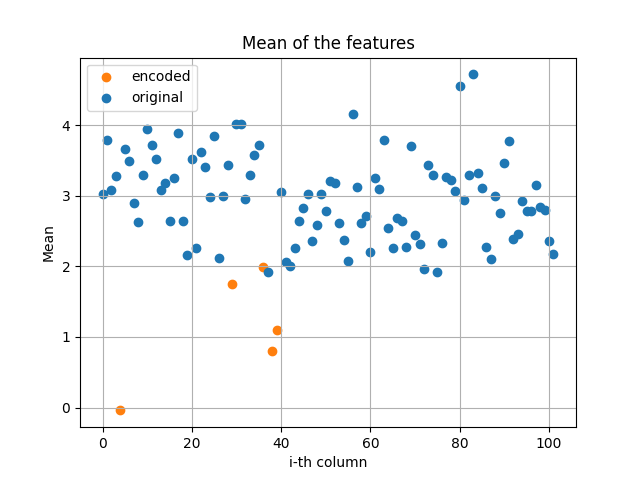

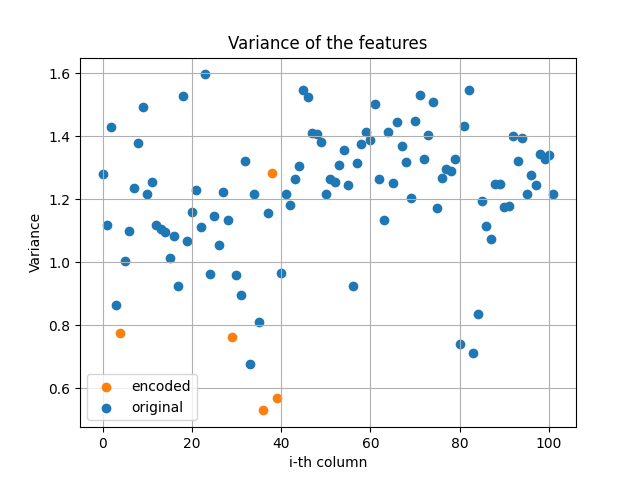

In [423]:
# 2-3
categorical = ['Smoking', 'Alcohol','Punctuality','Lying','Internet usage', 'Education', 'Gender', 'Hand', 'Only child', 'Home Town Type', 'Home Type']

howToMap = {
    'Smoking':          {'never smoked':    0,  'tried smoking':                    1,  'former smoker':    -1,  'current smoker':          3},
    'Alcohol':          {'never':           0,  'social drinker':                   1,  'drink a lot':      2}, 
    'Punctuality':      {'early':           -1, 'on time':                          0,  'late':             1}, 
    'Lying':            {'never':           0,  'only to avoid hurting someone':    1,  'sometimes':        2,  'everytime it suits me':    3},
    'Internet usage':   {'no time at all':  0,  'less than an hour a day':          1,  'few hours a day':  2,  'most of the day':          3},
    'Education':        {
        'currently a primary school pupil': 0, 
        'primary school': 1,
        'secondary school': 2,
        'college/bachelor degree': 3,
        'masters degree': 4,
        'doctorate degree': 5  
    },
    'Gender':           {'female':              -1, 'male':             1}, 
    'Hand':             {'left':                -1, 'right':            1}, 
    'Only child':       {'no':                  -1, 'yes':              1}, 
    'Home Town Type':   {'village':             -1, 'city':             1}, 
    'Home Type' :       {'block of flats':      -1, 'house/bungalow':   1},
}


for colName in data_df.columns:
    colSeries = data_df[colName].copy()

    colSeries.fillna(colSeries.mode()[0], inplace=True)
    # colSeries[colSeries.isna()] = colSeries.mode()[0]
    
    data_df[colName] = colSeries.copy()

data_fixed_df = data_df.copy()

for colName, valueMapping in howToMap.items():
    colSeries = data_fixed_df[colName].copy()

    for valueToMap, sobstitution in valueMapping.items():
        colSeries[colSeries == valueToMap] = sobstitution

    data_fixed_df[colName] = colSeries.copy()

    # data_fixed_df[colName] = data_fixed_df[colName].astype(float)

data_fixed_df = data_fixed_df.convert_dtypes()

# for col in data_fixed_df:
#     data_fixed_df[col] = data_fixed_df[col].astype(float)

X_df:pd.DataFrame

X_df, _ = sklearn.model_selection.train_test_split(data_fixed_df[these_features], test_size=0.33, random_state=random_seed)
# X_df = data_fixed_df[these_features].sample(frac=2/3, random_state=random_seed)
X_df = X_df.sort_index()

display(f"Type of data in resulting dataframe: {set(X_df.dtypes)}")
display(X_df)
display(f"Number of NaN: {X_df.isna().sum().sum()}")


desc = X_df.describe()

display(desc) 

display("Variances is descending order:")
variances = pd.DataFrame(desc.loc['std'].iloc[np.argsort(-desc.loc['std', :])], columns=['std']).T
display(variances)


colors = np.array([cm.tab10(1) if x in howToMap.keys() else cm.tab10(0) for x in X_df.columns])
mask = [x in howToMap.keys() for x in desc.columns]
mask_not = [not x for x in mask]

idx_encoded = [i for i, value in enumerate(X_df.columns) if value in howToMap.keys()]
idx_original = [i for i, value in enumerate(X_df.columns) if value not in howToMap.keys()]

plt.figure()
plt.scatter(
    x=idx_encoded, 
    y=desc.loc['mean', mask], 
    color=cm.tab10(1),
    label='encoded'
)
plt.scatter(
    x=idx_original,
    y=desc.loc['mean', mask_not], 
    color=cm.tab10(0),
    label='original'
)
plt.title(f"Mean of the features")
plt.legend()
plt.xlabel("i-th column")
plt.ylabel("Mean")
plt.grid()
plt.show()


plt.figure()
plt.scatter(
    x=idx_encoded, 
    y=desc.loc['std', mask], 
    color=cm.tab10(1),
    label='encoded'
)
plt.scatter(
    x=idx_original,
    y=desc.loc['std', mask_not], 
    color=cm.tab10(0),
    label='original'
)
plt.title(f"Variance of the features")
plt.legend()
plt.xlabel("i-th column")
plt.ylabel("Variance")
plt.grid()
plt.show()


## Exercise 2. Analyzing the Variance and the PCs

In the cells below, do the following operations:
1. create two new dataframes from _X_df_ applying a StandardScaler and a MinMaxscaler. Call these new dataframes as _Xstd_df_ and _Xmm_df_, respectively;
2. compute the variance of all the features in _X_df_, _Xstd_df_, and _Xmm_df_ and **comment the results**;
3. compute all the $n$ Principal Components (PCs) for each dataset _X_df_, _Xstd_df_, and _Xmm_df_. Then, visualize the curves of the cumulative explained variances and **comment the results**.

In [408]:
# 1 
Xstd_df = pd.DataFrame(StandardScaler().fit_transform(X_df), index=X_df.index, columns=X_df.columns)
Xmm_df = pd.DataFrame(MinMaxScaler((0,1)).fit_transform(X_df), index=X_df.index, columns=X_df.columns)

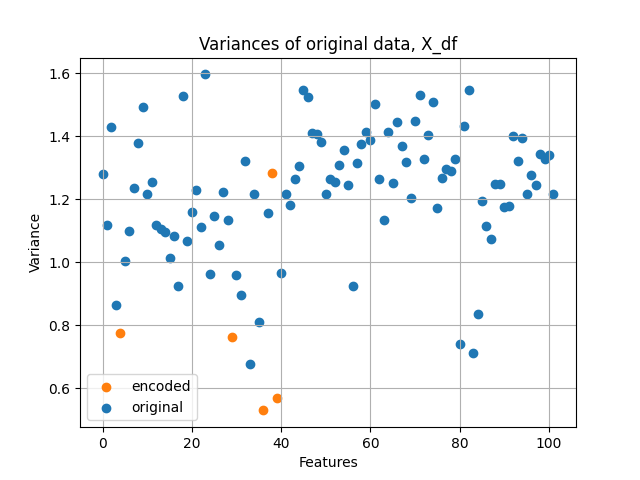

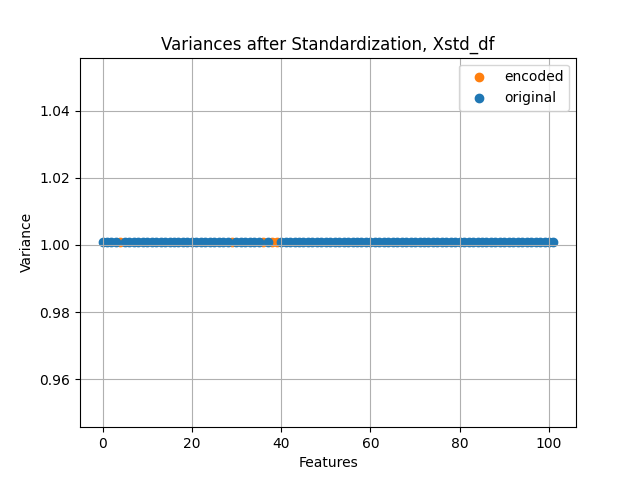

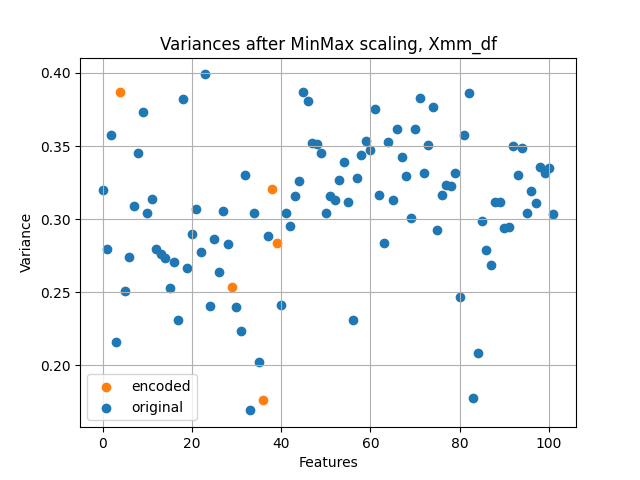

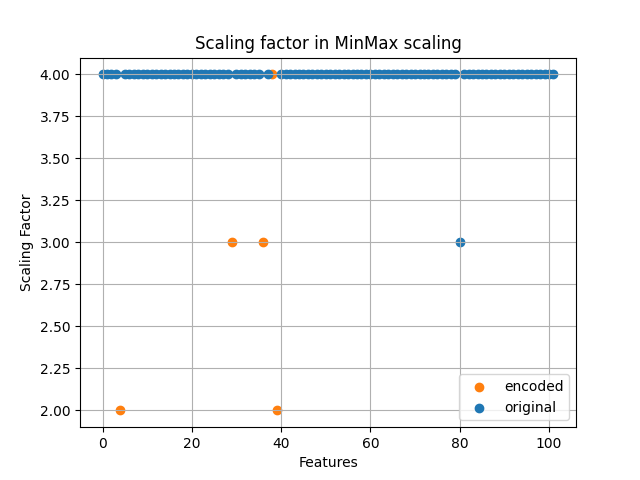

In [443]:
# 2
def plot_variances(X:pd.DataFrame, title):    
    plt.figure()
    desc = X.describe()
    plt.scatter(
        x=idx_encoded, 
        y=desc.loc['std', mask], 
        color=cm.tab10(1),
        label='encoded'
    )
    plt.scatter(
        x=idx_original,
        y=desc.loc['std', mask_not], 
        color=cm.tab10(0),
        label='original'
    )
    # plt.xticks(ticks=range(0, len(X.columns), 10), labels=[f'x{i}' for i in range(0, len(X.columns), 10)])
    plt.title(title)
    plt.xlabel('Features')
    plt.ylabel('Variance')
    plt.legend()
    plt.grid()
    plt.show()

plot_variances(X_df, "Variances of original data, X_df")
plot_variances(Xstd_df, "Variances after Standardization, Xstd_df")
plot_variances(Xmm_df, "Variances after MinMax scaling, Xmm_df")

plt.figure()
X_desc = X_df.describe()
Xmm_desc = Xmm_df.describe()

plt.scatter(
    idx_encoded,
    X_desc.loc['std', mask] / Xmm_desc.loc['std', mask],
    color=cm.tab10(1),
    label='encoded'
)
plt.scatter(
    idx_original,
    X_desc.loc['std', mask_not] / Xmm_desc.loc['std', mask_not],
    color=cm.tab10(0),
    label='original'
)
plt.title("Scaling factor in MinMax scaling")
plt.xlabel('Features')
plt.ylabel('Scaling Factor')
plt.legend()
plt.grid()
plt.show()


In [442]:

diff = desc.loc['max'] - desc.loc['min'] 

columns_not_equal_4 = diff[diff != 4].index.tolist()

display(X_desc.loc[['min', 'max'], columns_not_equal_4])


,Punctuality,Lying,Internet usage,Alcohol,Fun with friends
min,-1.0,0.0,0.0,0.0,2.0
max,1.0,3.0,3.0,2.0,5.0


We can see that in the original dataframe <I>X_df</I> in the first figure, that more or less all variances have the same order of magnitude, so when we will compute the PCA, our results won't be influenced much by the values of the features. But it's not garanteeded in general since a feature with high variance will absorb all information.<br>
When we apply a Standard Scaling, this problem is absent, so all the features contributes equally to the PCA analysis regardless of their numerical ranges.<br>
In the last dataframe <I>Xmm_df</I> the MinMax scaling let us remove the problem of features with high numerical ranges, the resulting variances will be scaled based on the maximum and minimum value of that feature. In this particular dataset almost all features have the same numerical range, but there are some who does not have a minimum of <I>1</I> and a maximum of <I>5</I>. Almost all of them are coming from how we encoded those values, the only exception is <I>"Fun with friends"</I> that has a minimum of <I>2</I>.

In [ ]:
# 3
pca_x = PCA(random_state=random_seed)
pca_x_std = PCA(random_state=random_seed)
pca_x_mm = PCA(random_state=random_seed)

pca_x.fit(X_df)
pca_x_std.fit(Xstd_df)
pca_x_mm.fit(Xmm_df)

Y_x = pca_x.transform(X_df)
Y_x_std = pca_x_std.transform(Xstd_df)
Y_x_mm = pca_x_mm.transform(Xmm_df)

def plot_explained_variance_ratio(pca:PCA, title:str):    
    plt.figure()
    plt.plot(np.arange(pca.n_features_in_), np.cumsum(pca.explained_variance_ratio_))
    plt.title(title)
    plt.ylim([0, 1.1])
    plt.xticks(ticks=np.arange(0, pca.n_features_in_, 10), 
            labels=[f'PC{i + 1}' for i in range(0, pca.n_features_in_, 10)])
    plt.xlabel('Principal components')
    plt.ylabel('Cumulative explained variance')
    plt.grid()
    plt.show()

plot_explained_variance_ratio(pca_x, 'Responses')
plot_explained_variance_ratio(pca_x_std, 'Responses with standardization')
plot_explained_variance_ratio(pca_x_mm, 'Responses with minmax scaling')


As highlighted in the previous point, the plot of cumulative explained variance from <I>X_df</I> and from <I>Xmm_df</I> are similar because the MinMax scaling had little effect on the variances, but for <I>Xstd_df</I> the are some differences, for example with 11 principal components we does not quite reach 40% of explained variance, while with the other two dataframes we do.<br>
An important observation is that in all cases the first principal component is more important than the others, hence why the graph does not starts at height close to 0.

## Exercise 3. Dimensionality Reduction and PC Interpretation

In the cells below, do the following operations:
1. For each one of the two dataframes _Xstd_df_, and _Xmm_df_, compute a new PCA for performing a dimensionality reduction with respect to $m$ dimensions. The value of $m$ must be $$m = \min\{m', 5\}\,,$$ where $m'$ is the value required for obtaining $33\%$ of the total variance.
2. For both the cases, visualize all the PCs and give a name/interpretation to them. **Comment and motivate your interpretations**. If possible, **compare the differences among the results obtained** for _Xstd_df_ and _Xmm_df_.
3. Perform the score graph for both the cases (_std_ and _mm_). If $m>3$, plot the score graph with respect to the first 3 PCs. All the **plots must show the names of the PCs on the axes** for better understanding the results.
4. **Optional:** plot more score graphs, coloring the dots with respect to any label in the list _labels_ that you believe can be interesting. **Comment and analyze this optional plots**.

In [226]:
# 1
a = np.cumsum(pca_x_std.explained_variance_ratio_)
m_prime_std = a.shape[0] - a[a > 0.33].shape[0] + 1
m_std = min(m_prime_std, 5)

a = np.cumsum(pca_x_mm.explained_variance_ratio_)
m_prime_mm = a.shape[0] - a[a > 0.33].shape[0] + 1
m_mm = min(m_prime_mm, 5)

pca_x_std_m = PCA(n_components=m_std, random_state=random_seed)
pca_x_mm_m = PCA(n_components=m_mm, random_state=random_seed)

Ystd_m_df = pca_x_std_m.fit_transform(Xstd_df)
Ymm_m_df = pca_x_mm_m.fit_transform(Xmm_df)

# making all PC have the same verse
for i in range(min(m_std, m_mm)):
    idx = np.argmax(pca_x_std_m.components_[i, :])
    dir = np.sign(pca_x_std_m.components_[i, idx]) * np.sign(pca_x_mm_m.components_[i, idx])
    pca_x_mm_m.components_[i,:] *= dir


In [ ]:
# 2.a
def get_index_categories(cmap_, cols, order, variables_by_type, these_types):
    norm = plt.Normalize(0, len(these_types))
    colors = []
    for col in cols[order]:
        for i, t in enumerate(these_types):
            var_list = variables_by_type[t]

            if col in var_list:
                colors.append(cmap_(norm(i)))
                break
    return colors

def create_custom_legend(cmap, cats): 
    norm = plt.Normalize(0, len(cats)) 
    legend_handles = [] 
    for i, t in enumerate(cats): 
        legend_handles.append(plt.Line2D([0], [0], color=cmap(norm(i)), lw=4, label=t))
    
    return legend_handles

def plot_principal_components(pca:PCA, m:int, columns, title:str, pc_names:list[str], cmap_=cm.gist_ncar):
    pcmax = pca.components_[:m, :].max()*1.1
    pcmin = pca.components_[:m, :].min()*1.1

    eps = np.sqrt(1/pca.n_features_in_)

    for i in range(m):
        plt.figure(figsize=(10,15))

        idx = np.argsort(pca.components_[i, :])

        # plt.barh(np.arange(0, pca_x.n_features_in_, step) - bar_height_std/2, pca_x.components_[i, :][idx][::step], height=bar_height_mm, label='Normal')
        plt.barh(np.arange(pca.n_features_in_), pca.components_[i, :][idx], color=get_index_categories(cmap_, columns, idx, variables_by_type, these_types))
        plt.axvline(x= eps, color='red', linestyle='--', linewidth=2)
        plt.axvline(x=-eps, color='red', linestyle='--', linewidth=2)

        plt.yticks(ticks=np.arange(pca.n_features_in_), labels=columns[idx].tolist()) 
        plt.xlim((pcmin, pcmax))
        plt.title(title + f', responses PC{i+1}: {pc_names[i]}, {100*pca.explained_variance_ratio_[i]:.2f}% of total variance')
        plt.grid()
        plt.tight_layout()

        legend_handles = create_custom_legend(cmap_, these_types) 
        plt.legend(handles=legend_handles, title="Feature Types")
            
        plt.show()

        display(f"High values:{columns[pca.components_[i,:] > eps].tolist()}")
        display(f"Low values:{columns[pca.components_[i,:] < -eps].tolist()}")

pc_names_std = ['Cultured/Artistic', 'Adventurous/energetic', 'Dynamic/Adaptable', 'Rebellious', 'Tech Oriented']
pc_names_mm = ['Cultured/Artistic', 'Adventurous/energetic', 'Dynamic/Adaptable', 'Social/Well-connected', 'Independent']

# plot_principal_components(pca_x_std_m, m_std, Xstd_df.columns, "Standardized", pc_names_std)
plot_principal_components(pca_x_mm_m, m_mm, Xmm_df.columns, "MinMax", pc_names_mm)


Standarized dataframe:
<ul>
    <li>PC1: this group of people is a mix of artistic and musical individuals who value culture and personal growth.</li>
    <li>PC2: these individuals are not easily frightened and strive for energetic environments while keeping composure.</li>
    <li>PC3: this type of people like fast-paced environments and enjoy making new connections, but they hate fear-inducing situations</li>
    <li>PC4: here indpendence is key, we can identify people who dislike following rules but still respects other individuals.</li>
    <li>PC5: individuals more oriented to technological fields who avoid politics and ecomomic discussions.</li>
</ul>

Minmax dataframe:
<ul>
    <li>PC1: we identify people more oriented to culture and artistic expressions.</li>
    <li>PC2: people who face fears and embrace generosity, while striving away from analytical fields.</li>
    <li>PC3: these people like dynamic environments and prefer active and engaging activites.</li>
    <li>PC4: individuals that keep up with current events, and enjoy social activities.</li>
    <li>PC5: people who enjoy breaking norms and rules while maintaining a strong connection with pets and animals.</li>
</ul>


In [ ]:
# 2.b
def plot_principal_components_comparisons(pca_x_std_m:PCA, pca_x_mm_m:PCA, m_std:int, m_mm:int, columns:list[str]):
    bar_space = 0.4
    bar_height = 0.2


    for i in range(min(m_std, m_mm)):
        plt.figure(figsize=(10,15)) 
        idx = np.argsort(pca_x_std_m.components_[i, :])

        plt.barh(np.arange(pca_x_std_m.n_features_in_) + bar_space/2, pca_x_std_m.components_[i, idx], height=bar_height, label='Standardized')
        plt.barh(np.arange(pca_x_mm_m.n_features_in_)  - bar_space/2, pca_x_mm_m.components_[i, idx], height=bar_height, label='Min-Max Scaled')
        
        plt.yticks(ticks=np.arange(pca_x_std_m.n_features_in_), labels=columns[idx].tolist()) 
        plt.title(f'Responses PC{i+1}')
        plt.grid()
        plt.tight_layout()
        plt.legend()

        plt.show()

plot_principal_components_comparisons(pca_x_std_m, pca_x_mm_m, m_std, m_mm, X_df.columns)


We can see that in the first two principal components there are some differences, but both <I>Xstd_df</I> and <I>Xmm_df</I> capture the same groups.<br>
Starting from the third component, their meaning start to diverge between the analyses.<br>
The third PC can still be connected to the same type of people since the features with the highest and lowest values are basically the same.<br>
But from the fourth PC we can no longer say that they represent the same individuals, this problem is even more highlighted in the fifth PC.<br>
This happens because of two motives:
<ol>
<li>We used different scaling techniques, so the information carried by the features is different</li>
<li>As we inspect deeper into the PCs, their explained varience becomes lower and lower, for example PC1 explain about 8% of the total variance and PC5 just about 3% of total variance. So the information carried is less and they should be contribute less in the decisions arised from this aanalysis.</li>
</ol>



In [260]:
def score_graph2D(Y, title, ax_names, colors, all_same_color=False, mappable=None):
    scoregraph = plt.figure()
    ax = scoregraph.add_subplot()

    if all_same_color:
        ax.scatter(Y[:, 0], Y[:, 1], color=colors)
    else:
        ax.scatter(Y[:, 0], Y[:, 1], c=colors)

    plt.title(title)
    ax.set_xlabel(ax_names[0])
    ax.set_ylabel(ax_names[1])

    if mappable is not None:
        plt.colorbar(mappable=mappable, ax=ax)

    plt.grid()

    return ax

def score_graph3D(Y, title, ax_names, colors, all_same_color=False, mappable=None):
    scoregraph = plt.figure()
    ax = scoregraph.add_subplot(111, projection='3d')

    if all_same_color:
        ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2], color=colors)
    else:
        ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c=colors)
        
    plt.title(title)
    ax.set_xlabel(ax_names[0])
    ax.set_ylabel(ax_names[1])
    ax.set_zlabel(ax_names[2])
    
    if mappable is not None:
        plt.colorbar(mappable=mappable, ax=ax)
    
    plt.grid()
    return ax


In [ ]:
# 3
cmap_1 = cm.tab10
    
score_graph2D(Ystd_m_df, "STANDARDIZED - SCORE GRAPH", pc_names_std,   cmap_1(1),   True)
score_graph2D(Ymm_m_df,  "MINMAX - SCORE GRAPH",       pc_names_mm,    cmap_1(0),   True)
score_graph3D(Ystd_m_df, "STANDARDIZED - SCORE GRAPH", pc_names_std,   cmap_1(1),   True)
score_graph3D(Ymm_m_df,  "MINMAX - SCORE GRAPH",       pc_names_mm,    cmap_1(0),   True)


In [ ]:
#4
cmap_2 = cm.viridis

cat = labels[2]
values = data_fixed_df.loc[X_df.index, cat]
norm = plt.Normalize(vmin=np.min(values), vmax=np.max(values)) 

if cat in ['Age', 'Height', 'Weight', 'Number of siblings']:
    mappable = cm.ScalarMappable(norm=norm, cmap=cmap_2)
else:
    mappable = None
    handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap_2(norm(val)), markersize=10, label=label) for label, val in howToMap[cat].items()]

ax1 = score_graph2D(Y=Ystd_m_df, title=f"STANDARDIZED - SCORE GRAPH, colored on {cat}", ax_names=pc_names_std, colors=cmap_2(norm(values.astype(int))),  all_same_color=False, mappable=mappable)
ax2 = score_graph2D(Y=Ymm_m_df,  title=f"MINMAX - SCORE GRAPH, colored on {cat}",       ax_names=pc_names_mm,  colors=cmap_2(norm(values.astype(int))),  all_same_color=False, mappable=mappable)
ax3 = score_graph3D(Y=Ystd_m_df, title=f"STANDARDIZED - SCORE GRAPH, colored on {cat}", ax_names=pc_names_std, colors=cmap_2(norm(values.astype(int))),  all_same_color=False, mappable=mappable)
ax4 = score_graph3D(Y=Ymm_m_df,  title=f"MINMAX - SCORE GRAPH, colored on {cat}",       ax_names=pc_names_mm,  colors=cmap_2(norm(values.astype(int))),  all_same_color=False, mappable=mappable)

# a = create_custom_legend(cmap_, data_df.loc[X_df.index, cat].unique())

if cat in ['Gender', 'Hand','Education', 'Only child', 'Home Town Type', 'Home Type']:
    # ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), handles=handles)
    ax1.legend(handles=handles)
    ax2.legend(handles=handles)
    ax3.legend(handles=handles)
    ax4.legend(handles=handles)



In [ ]:
values = data_fixed_df.loc[X_df.index, cat]


## Exercise 4. $k$-Means

In the cells below, do the following operations:
1. For each one of the two datasets (_std_ and _mm_), run the $k$-Means for clustering the data. In particular, **use the silohuette score for identify the best value for $k\in\{3, \ldots, 10\}$**.
2. Plot the score graphs of exercise 3.3, adding the centroids of the cluster.
3. Observing the centroids coordinates in the PC space, **give a name/interpretation to them**, exploiting the names you assigned to the PCs. **Comment and motivate your interpretations**.

In [ ]:
# 1
def run_kmeans(Y)-> KMeans:
    km_list = []
    silcoeff_list = []
    k_list = list(range(3, 11))

    for i in range(len(k_list)):
        # print(f'****************** START k-MEANS WITH k={k_list[i]} ******************')
        # print('Computing...')
        km_list.append(KMeans(n_clusters=k_list[i], random_state=random_seed))
        km = km_list[i]
        km.fit(Y)
        silcoeff_list.append(silhouette_score(Y, labels=km.fit_predict(Y)))
        # print(f'****************** END k-MEANS WITH k={k_list[i]} ******************')
        # print('')

    i_best = np.argmax(silcoeff_list)
    k = k_list[i_best]
    km = km_list[i_best]

    print('****************** RESULTS OF THE SEARCH... ******************')
    print(f'BEST SILHOUETTE SCORE: {silcoeff_list[i_best]} --> k = {k}')
    print('**************************************************************')

    print(silcoeff_list)

    return km

km_std_best = run_kmeans(Ystd_m_df)
display("avavula avavula")
km_mm_best = run_kmeans(Ymm_m_df)

In [ ]:
#TODO: change palette with lighter colors
# 2
cat = 'Gender'
values = data_fixed_df.loc[X_df.index, cat]
norm = plt.Normalize(vmin=np.min(values), vmax=np.max(values)) 
mappable = cm.ScalarMappable(norm=norm, cmap=cm.viridis)

cluster_assignment_std = km_std_best.predict(Ystd_m_df)
cluster_assignment_mm = km_mm_best.predict(Ymm_m_df)

ax = score_graph2D(Ystd_m_df, f'STANDARDIZED - SCORE GRAPH, colored based on {cat}', pc_names_std, values, False, mappable)
ax.scatter(km_std_best.cluster_centers_[:, 0], km_std_best.cluster_centers_[:, 1], c='black', marker='*')
plt.show()

ax = score_graph2D(Ystd_m_df, f'STANDARDIZED - SCORE GRAPH, colored based on cluster assignment', pc_names_std, cluster_assignment_std, False)
ax.scatter(km_std_best.cluster_centers_[:, 0], km_std_best.cluster_centers_[:, 1], c='black', marker='*')
plt.show()

ax = score_graph2D(Ymm_m_df, f'MINMAX - SCORE GRAPH, colored based on {cat}', pc_names_mm, values, False, mappable)
ax.scatter(km_mm_best.cluster_centers_[:, 0], km_mm_best.cluster_centers_[:, 1], c='black', marker='*')
plt.show()

ax = score_graph2D(Ymm_m_df, f'MINMAX - SCORE GRAPH, colored based on cluster assignment', pc_names_mm, cluster_assignment_mm, False)
ax.scatter(km_mm_best.cluster_centers_[:, 0], km_mm_best.cluster_centers_[:, 1], c='black', marker='*')
plt.show()

ax = score_graph3D(Ystd_m_df, f'STANDARDIZED - SCORE GRAPH, colored based on {cat}', pc_names_std, values, False, mappable)
ax.scatter(km_std_best.cluster_centers_[:, 0], km_std_best.cluster_centers_[:, 1], km_std_best.cluster_centers_[:, 2], c='black', marker='*')
plt.show()

ax = score_graph3D(Ystd_m_df, f'STANDARDIZED - SCORE GRAPH, colored based on cluster assignment', pc_names_std, cluster_assignment_std, False)
ax.scatter(km_std_best.cluster_centers_[:, 0], km_std_best.cluster_centers_[:, 1], km_std_best.cluster_centers_[:, 2], c='black', marker='*')
plt.show()

ax = score_graph3D(Ymm_m_df, f'MINMAX - SCORE GRAPH, colored based on {cat}', pc_names_mm, values, False, mappable)
ax.scatter(km_mm_best.cluster_centers_[:, 0], km_mm_best.cluster_centers_[:, 1], km_mm_best.cluster_centers_[:, 2], c='black', marker='*')
plt.show()

ax = score_graph3D(Ymm_m_df, f'MINMAX - SCORE GRAPH, colored based on cluster assignment', pc_names_mm, cluster_assignment_mm, False)
ax.scatter(km_mm_best.cluster_centers_[:, 0], km_mm_best.cluster_centers_[:, 1], km_mm_best.cluster_centers_[:, 2], c='black', marker='*')
plt.show()


In [ ]:
# 3
maxs_std_m = Ystd_m_df.max(axis=0) 
mins_std_m = Ystd_m_df.min(axis=0) 

maxs_mm_m = Ymm_m_df.max(axis=0) 
mins_mm_m = Ymm_m_df.min(axis=0) 

k_std = km_std_best.cluster_centers_.shape[0]
k_mm = km_mm_best.cluster_centers_.shape[0]

fig_mm, ax_mm = plt.subplots(1, k_mm, figsize=(15, 5))
for ii in range(k_mm):
    ax_mm[ii].bar(np.arange(km_mm_best.cluster_centers_.shape[1]), maxs_mm_m, color='blue', alpha=0.15)
    ax_mm[ii].bar(np.arange(km_mm_best.cluster_centers_.shape[1]), mins_mm_m, color='blue', alpha=0.15)
    ax_mm[ii].bar(np.arange(km_mm_best.cluster_centers_.shape[1]), km_mm_best.cluster_centers_[ii, :])
    ax_mm[ii].set_xticks(ticks=np.arange(km_mm_best.cluster_centers_.shape[1]))
    ax_mm[ii].set_xticklabels(labels=pc_names_mm, rotation=45)
    ax_mm[ii].grid(visible=True, which='both')
    ax_mm[ii].set_title(f'MinMax - CENTROID {ii+1}')


fig_std, ax_std = plt.subplots(1, k_std, figsize=(15, 5))
for ii in range(k_std):
    ax_std[ii].bar(np.arange(km_std_best.cluster_centers_.shape[1]), maxs_std_m, color='blue', alpha=0.15)
    ax_std[ii].bar(np.arange(km_std_best.cluster_centers_.shape[1]), mins_std_m, color='blue', alpha=0.15)
    ax_std[ii].bar(np.arange(km_std_best.cluster_centers_.shape[1]), km_std_best.cluster_centers_[ii, :])
    ax_std[ii].set_xticks(ticks=np.arange(km_std_best.cluster_centers_.shape[1]))
    ax_std[ii].set_xticklabels(labels=pc_names_std, rotation=45)
    ax_std[ii].grid(visible=True, which='both')
    ax_std[ii].set_title(f'Standard - CENTROID {ii+1}')
    

## Exercise 5. Cluster Evaluations

In the cells below, do the following operations:
1. For each one of the two datasets (_std_ and _mm_), perform an **external evaluation** of the clustering obtained at exercise 4.1 with respect to one or more labels in the list _labels_. **Comment the results, comparing the evaluation with the interpretation you gave at exercise 4.3**. 
2. For each one of the two datasets (_std_ and _mm_), perform an **internal evaluation** of each cluster, with respect to the silohuette score. **Comment the results**. 

In [ ]:
# 1
def external_evaluation(cluster_assignment, label_series):
    distribution = pd.crosstab(cluster_assignment, label_series)

    distribution.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

external_evaluation(cluster_assignment_std, data_fixed_df.loc[Xstd_df.index, labels[4]])
external_evaluation(cluster_assignment_mm, data_fixed_df.loc[Xmm_df.index, labels[4]])


In [ ]:
# 2
def internal_evaluation(kmean:KMeans, Y, cluster_assignment):
    n_clusters = kmean.cluster_centers_.shape[0]

    sil_sample_series = silhouette_samples(Y, labels=cluster_assignment)
    y_lower = 10

    plt.figure()
    for i in range(n_clusters):
        ith_cluster_silhouette_values = np.sort(sil_sample_series[cluster_assignment == i])

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        y_lower = y_upper +10

    plt.show()

internal_evaluation(km_std_best, Ystd_m_df, cluster_assignment_std)
internal_evaluation(km_mm_best, Ymm_m_df, cluster_assignment_mm)
